<a href="https://colab.research.google.com/github/Sunantha17/Healthiness_prediction/blob/main/Healthiness_Rating_Prediction_on_Food_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Building a machine learning solution using the MLEnd Yummy Dataset where we have uploaded the food images taken by us

In [ ]:
# Installing MLEnd yummy dataset
!pip install mlend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00


# **1. Author**


Sunantha Kannan


# **2. Problem formulation**

Given a set of food images, the goal is to develop an algorithm that predicts the healthiness rating of each image, categorizing it into either "Healthy" or "Unhealthy." Key points:

Categories are predefined and fixed; the algorithm predicts whether an image is "Healthy" or "Unhealthy" and does not identify new healthiness categories.

The problem is limited to predicting a single healthiness rating for each image, excluding the identification of multiple labels or objects in a single image.

# **3. Machine Learning Pipeline:**

Based on the problem, we can define as  supervised learning where we havea data with known categories, or answers, in advance, and using these answers to teach the algorithm how to make predictions about new data.

A machine learning pipeline is a structured methodology for building, training, and deploying models. In the context of predicting the healthiness of dishes based on images and other features, the following pipeline has been designed:

**1.Data Loading & preprocessing** ➔

    Input as food images with metadata
    Preprocessing the health and unhealthy data based on labelling

**2.Resizing** ➔
    
    Make it square function
    Resizing images to standard dimensions for consistent input.

**3.Feature Extraction** ➔
    
    *Yellow components, GLCM, color moments*
    Extracting features to capture relevant information about appearance, texture, and color distribution.

**4.PCA** ➔

    *Standard Scaler, Principal Components*
    Applying Principal Component Analysis (PCA) to reduce dimensionality while retaining essential information.

**5.Model Prediction**➔

    *Trained classifiers (Random Forest, KNN, XGBOOST)*
     Training multiple classifiers to predict the healthiness of dishes.

**6.Model Evaluation** ➔

    *Classification report, accuracy, and additional metrics*
    Evaluating model performance using classification metrics, including precision, recall, and F1-score.
    Addressing any specific considerations or challenges encountered during evaluation.

# **4. Transformation stage:**

**Step 1: Data Preparation and preprocessing:**

All the images has been downloaded from this path** baseDir = download_yummy_small(save_to = '/content/drive/MyDrive/Data/MLEnd') **. This dataset consists of a total of 3250 images along with meta data from the MLEnd Yummy Dataset.

In this phase, the dataset is loaded, labeled, shuffled, and imputed.

**Data Loading**: Libraries are imported, and the dataset containing information about dish images, names, ingredients, and healthiness ratings is loaded.

**Data imbalance**: To avoid biased output we are going to take balanced proportion of healthy and unhealthy data

**Labeling:** Labels for healthy and unhealthy dishes are created based on healthiness ratings.

**Shuffling:** The dataset is randomly shuffled to ensure a balanced distribution of samples.

**Imputation:** Missing values are handled in the labels, by filling with the most frequent values.







**Step 2: Image Resizing and Feature Extraction**
During this phase, images are processed, resized, and relevant features are extracted.

This includes:

**Image Loading:** Reading and loading image files associated with each dish.

**Image Resizing:** As the resizing process taking around more than 6 hours , we are computing the make_it_square and resize_img function for all the images that are resized to a square format to ensure uniformity. The resizing process is crucial for consistent inputs to machine learning models.


**Step 3: Dataset Split**

we will split the dataset into two random subsets for training and testing purposes using train_test_split method. The training data is what we will show the algorithm along with the relevant answers during the training phase. The testing data is used exclusively for evaluating how well a given algorithm works in practice.

**Step 4: Feature Extraction**

**Yellow Component:**
Captures the freshness and vibrancy associated with the color yellow in food, helping the model identify visually appealing and potentially healthier dishes.

**Gray-Level Co-occurrence Matrix (GLCM) Features**:Describes the texture and patterns in the images which helps the model tp understand the texture of the food, which can be a key factor in distinguishing between healthy and unhealthy options. For instance, it can identify the crispiness or smoothness of the dish.

**Color Moments:** It provides the overall color distribution in the images.
  Healthy dishes may exhibit a more diverse and lively color palette compared to potentially less vibrant colors in unhealthy dishes which gives insights into the variety and vibrancy of colors in the dish.

**Step 5: PCA**:

  It uses standard scaler method to make data normalization.

  Principal component analysis used for dimensionality reduction and feature engineering. Instead of using the original features, we are reducing the dimensiond of feature vectors into n components to extract the meanigful pattern of data

# **5.Modelling:**

**Machine Learning Model Construction**

**Model Selection:**
Choosing suitable machine learning algorithms for the problem.
The below models chosen for training\testing\predicting the data:

1.**k-Nearest Neighbours**:
It is one of the simplest supervised learning algorithm.
Finding the k 'closest' neighbouring images within the training dataset
by looking at the category for each of these neighbours and
combine the category for each neighbour into an overall prediction

2.**RandomForest classifier:**Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

3.**XGBoost:**XGBoost is a classification algorithm. It's designed for problems where you have a bunch of training data that can be used to create a classifier, and then you have new data that you want to classify.

4.**Linear SVC**: Linear SVC is effective in high-dimensional spaces, which is common in image classification problems where each pixel or feature contributes to the overall classification.

By leveraging these models, machine learning pipeline aims to capture a range of features and relationships present in the image data, ultimately enhancing the accuracy and reliability of healthiness predictions for dishes.



# **6. Methodology:**

**Validation:**

The trained models are  validated using the testing set. This step involves predicting the healthiness ratings for the images in the testing set.

**Accuracy:**

The primary metric for assessing model performance is accuracy, which measures the percentage of correctly classified instances out of the total instances in the testing set. It provides a general overview of how well the model is performing.

**Classification Reports:**

Detailed classification reports are generated for each model, providing precision, recall, F1-score, and support for each class (healthy and unhealthy). These metrics offer insights into the model's ability to correctly identify instances of each class.


**Confusion Matrix:**

Confusion matrices are created to visualize the number of true positives, true negatives, false positives, and false negatives. This allows for a more granular understanding of the model's performance, especially in terms of misclassifications.

**Training Accuracy:**

The accuracy of each model on the training set is also monitored to ensure that the models are learning from the training data effectively. This helps identify potential overfitting or underfitting issues.

**Additional Metrics:**

Depending on the specific requirements and characteristics of the problem, additional metrics such as precision-recall curves, ROC-AUC, or sensitivity analysis may be considered.

# **7. Dataset**

**Importing Libraries:**


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mlend import download_yummy, yummy_load, yummy_small_load
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from skimage.color import rgb2hsv, rgb2gray
from skimage.feature import graycomatrix, graycoprops
from skimage import color
import spkit as sp
import IPython.display as ipd
from tqdm import tqdm
import librosa

**Mounting google drive**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Downloading Images from Yummy Dataset**

In [ ]:
# Downloaded and stored the 3250 images from the Yummy dataset in the specified base directory path
# to optimize execution time and streamline the process

# baseDir = download_yummy(save_to = '/content/drive/MyDrive/Data_full/MLEnd/')

There is a subfolder ('MLEndYD_images') together with a CSV file ('MLEndYD_image_attributes_benchmark.csv'). The subfolder contains all the photos in the MLEnd  Yummy dataset by checking the contents of this folder via Google Drive.

In [ ]:
# Read the dataset
MLEnd_df = pd.read_csv("/content/drive/MyDrive/Data_full/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv")

**Resized images**:

The processed/resized of 3250 images  are stored in the directory "/content/drive/MyDrive/Colab Notebooks/final_image" for efficient access during model training by using the below resize method*

**Note: **

    Please find the code snippet for resizing original image into 200*200 size image and storing my drive path for easy and efficicient access.
    Uncomment the resized file saving code if required

In [ ]:
 # Function to make the image square
def make_it_square(I, pad=0):
    N, M, C = I.shape
    if N > M:
        Is = [np.pad(I[:, :, i], [(0, 0), (0, N - M)], 'constant', constant_values=pad) for i in range(C)]
    else:
        Is = [np.pad(I[:, :, i], [(0, M - N), (0, 0)], 'constant', constant_values=pad) for i in range(C)]

    return np.array(Is).transpose([1, 2, 0])

# Function to resize the image
def resize_img(I, size=[100, 100]):
    N, M, C = I.shape
    Ir = [transform.resize(I[:, :, i], size) for i in range(C)]
    return np.array(Ir).transpose([1, 2, 0])


# final_path = "/content/drive/MyDrive/Colab Notebooks/final_image"

# for k,file in enumerate(MLEnd_df['filepath']):
#   sp.utils.ProgBar_JL(k,len(MLEnd_df_temp['filepath']),L=50,color='blue')
#   I = plt.imread(file)
#   I = make_it_square(I, pad=0)
#   I = resize_img(I,size=[200,200])
#   filename = os.path.basename(file.split('/')[-1])
#   final_image_path = os.path.join(final_path, filename)
#   plt.imsave(final_image_path, I)

**Data Subsetting, labelling, preprocessing:**

In [ ]:
MLEnd_df['Healthiness_rating'].value_counts()

healthy           1267
neutral            785
very_healthy       607
unhealthy          467
very_unhealthy     123
Name: Healthiness_rating, dtype: int64

Subsetting the data which contains healthy, very_healthy as "Healthy Data" and unhealthy, very_unhealthy as "UnHealthy Data"

Sampling only 250 rows from each category to avoid biased output and good accuracy

In [ ]:
# Selecting data for healthy and unhealthy labels
healthy_data = MLEnd_df[MLEnd_df['Healthiness_rating'].isin(['healthy', 'very_healthy'])].sample(250)
unhealthy_data = MLEnd_df[MLEnd_df['Healthiness_rating'].isin(['unhealthy', 'very_unhealthy'])].sample(250)

# Combining healthy and unhealthy data
MLEnd_df = pd.concat([healthy_data, unhealthy_data])

# Adding a 'Label' column to indicate the class
healthy_data['Label'] = 'healthy'
unhealthy_data['Label'] = 'unhealthy'

# Adding a 'Label_encoded' column to indicate the encoded values
healthy_data['Label_encoded'] = 0  # Assuming 'healthy' is encoded as 0
unhealthy_data['Label_encoded'] = 1  # Assuming 'unhealthy' is encoded as 1

# Appending the 'Label' column to the original mlend_dataset
MLEnd_df['Label'] = pd.concat([healthy_data['Label'], unhealthy_data['Label']])

# Appending the 'Label_encoded' column to the original mlend_dataset
MLEnd_df['Label_encoded'] = pd.concat([healthy_data['Label_encoded'], unhealthy_data['Label_encoded']])

# Shuffling the dataset by randomly reordering the rows and resetting index to 1
MLEnd_df = MLEnd_df.sample(frac=1).reset_index(drop=True)

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
MLEnd_df['Label'] = imputer.fit_transform(MLEnd_df[['Label']])
MLEnd_df['Label_encoded'] = imputer.fit_transform(MLEnd_df[['Label_encoded']])



In [ ]:
# Split the data into train and test sets using train_test_split method
X = MLEnd_df.drop('Label_encoded', axis=1)
Y = MLEnd_df['Label_encoded']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)


In [ ]:
# Path of resized images folder in drive
ofile = '/content/drive/MyDrive/Colab Notebooks/final_image/'

# storing resized image path to X_train_paths, X_test_paths
X_train_paths = []
for i,im in X_train.iterrows():
  X_train_paths.append(ofile+X_train.loc[i,'filename'])

X_test_paths = []
for i,im in X_test.iterrows():
  X_test_paths.append(ofile+X_test.loc[i,'filename'])

# storing training and testing images in the list
print("Train Images")
X_train = []
for k, file in enumerate(X_train_paths):
    sp.utils.ProgBar_JL(k, len(X_train_paths), L=50, color='blue')
    I = plt.imread(file)
    X_train.append(I)
print("Test Images")
X_test = []
for k, file in enumerate(X_test_paths):
    sp.utils.ProgBar_JL(k, len(X_test_paths), L=50, color='blue')
    I = plt.imread(file)
    X_test.append(I)

# storing training and testing set of X_train, X_test and Y_train, Y_test as  numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)


Y_train = np.array(Y_train)
Y_test  = np.array(Y_test)

print("Shape of Train Data",X_train.shape)
print("Shape of Test Data",X_test.shape)

Train Images
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|350\350|
Done!
Test Images
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|150\150|
Done!
Shape of Train Data (350, 200, 200, 3)
Shape of Test Data (150, 200, 200, 3)


Healthy_Images


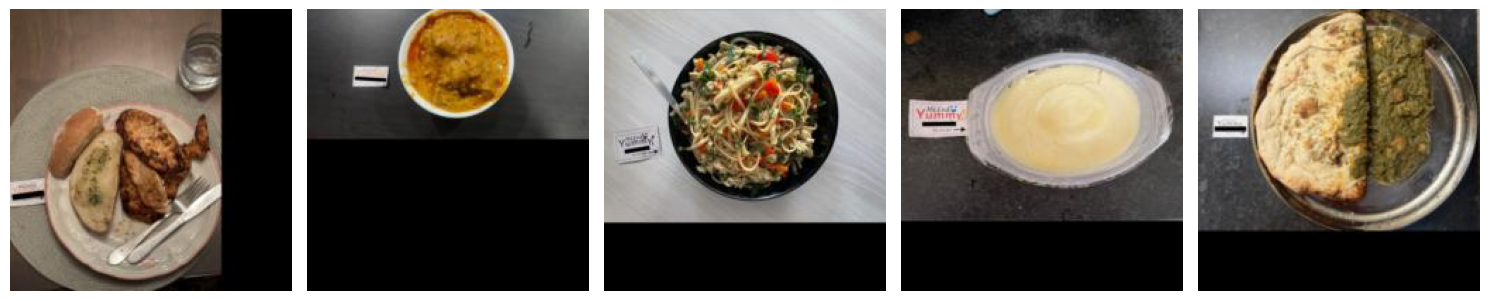

Unhealthy_Images


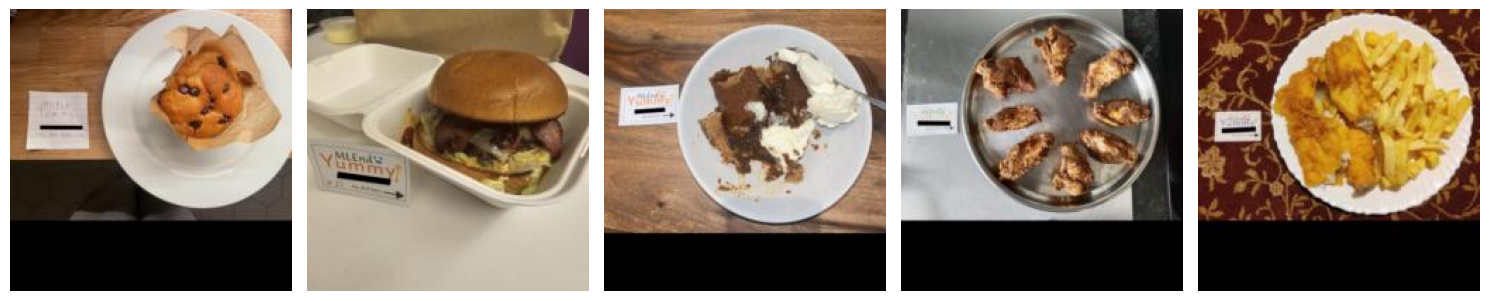

In [ ]:
# Displaying the resized healthy and unhealthy imagesfrom the training path
healthy_Img = np.array(X_train_paths)[Y_train==0]
unhealthy_Img = np.array(X_train_paths)[Y_train==1]

print('Healthy_Images')
plt.figure(figsize=(15,5))
for k,file in enumerate(healthy_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Unhealthy_Images')
plt.figure(figsize=(15,5))
for k,file in enumerate(unhealthy_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

**Feature extraction functions**

In [ ]:
# Feature extraction functions
def get_yellow_component(I, t1=27, t2=33):
    Ihsv = (rgb2hsv(I) * 255).astype('uint8')
    mask = (Ihsv[:, :, 0] < t2) * (Ihsv[:, :, 0] > t1)
    Ypx = mask.sum()
    return Ypx

def get_green_component(I):
    # Extract the green channel from the RGB image
    I_green = I[:, :, 1]
    Gpx = I_green.sum()
    return Gpx

def GMLC_features(I):
    Ig = (rgb2gray(I) * 255).astype('uint8')
    glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
    f2 = graycoprops(glcm, 'correlation')[0, 0]
    return f1, f2

def color_moments(image):
    lab_image = color.rgb2lab(image)
    l_channel, a_channel, b_channel = lab_image[:, :, 0], lab_image[:, :, 1], lab_image[:, :, 2]
    mean_l, mean_a, mean_b = np.mean(l_channel), np.mean(a_channel), np.mean(b_channel)
    var_l, var_a, var_b = np.var(l_channel), np.var(a_channel), np.var(b_channel)
    color_moments = [mean_l, mean_a, mean_b, var_l, var_a, var_b]
    return color_moments

In [ ]:
X_train_feature = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  f4,f5,f6,f7,f8,f9 = color_moments(I)
  f10 = get_green_component(I)
  X_train_feature.append([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10])

X_test_feature = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  f4,f5,f6,f7,f8,f9 = color_moments(I)
  f10 = get_green_component(I)
  X_test_feature.append([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10])


In [ ]:
X_train_feature = np.array(X_train_feature)
X_test_feature = np.array(X_test_feature)

#Printing the shape of train and test dataset after feature extraction
print("Train Featured Dataset", X_train_feature.shape)
print("\nTest Featured Dataset", X_test_feature.shape)


Train Featured Dataset (350, 10)

Test Featured Dataset (150, 10)


**Standardize features**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feature)
X_test_scaled = scaler.transform(X_test_feature)

**Principal component analysis**


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**SUPERVISED LEARNING ALGORITHMS:**

- **Linear SVC:**

  A Linear Support Vector Classifier (Linear SVC) is a type of support vector machine (SVM) that is specifically designed for linearly separable datasets. It aims to find a hyperplane that best separates the data into different classes. The "linear" in Linear SVC implies that the decision boundary is a straight line in two dimensions or a hyperplane in higher dimensions.

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1,class_weight ='balanced')
model.fit(X_train_pca,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LinearSVC(C=1, class_weight='balanced')

In [ ]:
# Make predictions on the test set
y_pred_svc_test = model.predict(X_test_pca)
y_pred_svc_train =model.predict(X_train_pca)


  - **RandomForestClassifier Algorithm**

  The below code initializes the classifier, trains it on the principal components of the training data (X_train_pca, Y_train), and then makes predictions on both the training and test datasets.

In [ ]:
rf = RandomForestClassifier(n_estimators=5, random_state=42)

# Train the RandomForestClassifier using the pipeline
rf.fit(X_train_pca, Y_train)

# Make predictions on the test set
y_pred_rf_test = rf.predict(X_test_pca)
y_pred_rf_train =rf.predict(X_train_pca)



-  **XGBoost Algorithm**
  
  Training a XGBoost classifier with 5 trees on the principal components of the training set. The model was used to predict labels for both the training and test sets, generating y_pred_xgb_train and y_pred_xgb_test, respectively.
  
   XGBoost supports GPU acceleration, which can significantly speed up the training process, especially for large datasets.

In [ ]:
xgb = XGBClassifier(n_estimators=5, random_state=42)

In [ ]:

# Train the XGBClassifier using the pipeline
xgb.fit(X_train_pca, Y_train)

# Make predictions on the test set
y_pred_xgb_test = xgb.predict(X_test_pca)
y_pred_xgb_train = xgb.predict(X_train_pca)


- **KNNeighborsClassifier**:

 The code KNeighborsClassifier(n_neighbors=5) initializes a k-Nearest Neighbors (KNN) classifier with the purpose of making predictions based on the majority class of the 5 nearest neighbors to a given data point.

 This parameter influences the model's flexibility, where a lower value makes the model more flexible but potentially noisy, while a higher value introduces more bias. The choice of n_neighbors is a critical aspect of tuning the model's performance and requires experimentation for optimal results.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the KNNeighborsClassifier using the pipeline
knn.fit(X_train_feature, Y_train)

# Make predictions on the test set
y_pred_knn_test = knn.predict(X_test_feature)
y_pred_knn_train =knn.predict(X_train_feature)


# **8.Results**


In [ ]:
# Confusion Matrix
def showConfMat(CM, labels = ['Healthy','Unhealthy']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

**Linear SVC Model Evaluation:**

In [ ]:
# Evaluate the XGBClassifier
accuracy_svc = accuracy_score(Y_test, y_pred_svc_test)
print(f"Linear SVCClassifier Test accuracy: {accuracy_svc}")

train_accuracy_svc = accuracy_score(Y_train, y_pred_svc_train)
print(f"Linear SVCClassifier Train Accuracy: {train_accuracy_svc}")

# Display classification report for XGBClassifier
print("Linear SVCClassifier Test Classification Report:")
print(classification_report(Y_test, y_pred_svc_test))

# Display classification report for XGBClassifier
print("Linear SVC Train Classification Report:")
print(classification_report(Y_train, y_pred_svc_train))

Linear SVCClassifier Test accuracy: 0.5066666666666667
Linear SVCClassifier Train Accuracy: 0.56
Linear SVCClassifier Test Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.45      0.48        75
           1       0.51      0.56      0.53        75

    accuracy                           0.51       150
   macro avg       0.51      0.51      0.51       150
weighted avg       0.51      0.51      0.51       150

Linear SVC Train Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.59      0.57       175
           1       0.56      0.53      0.54       175

    accuracy                           0.56       350
   macro avg       0.56      0.56      0.56       350
weighted avg       0.56      0.56      0.56       350



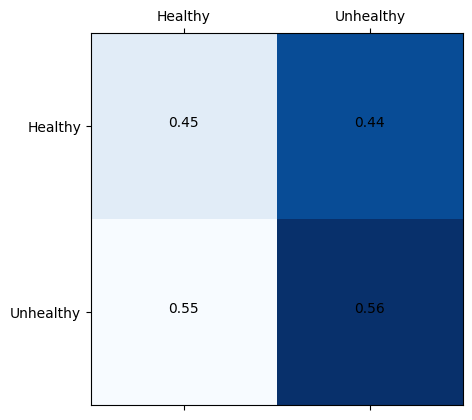

In [ ]:
# Metrics for confusion matrix
Ah_svc = np.mean(y_pred_svc_test[Y_test.astype(int)==0]==0)
Au_svc = np.mean(y_pred_svc_test[Y_test.astype(int)==1]==1)
Mh_svc = np.mean(y_pred_svc_test[Y_test.astype(int)==0]==1)
Mu_svc = np.mean(y_pred_svc_test[Y_test.astype(int)==1]==0)

CM_svc = np.array([[Ah_svc, Mh_svc],[Mu_svc, Au_svc]])

showConfMat(CM_svc)

**Summary:**

Linear SVC Classifier has similar performance to XGBClassifier, with a test accuracy of 0.51 and a train accuracy of 0.56.

The precision, recall, and F1-score are balanced for both healthy (0) and unhealthy (1) classes in the test classification report.

Similar to XGBClassifier, further analysis and potential adjustments may be considered for better generalization.

**Randomforest classifier model evaluation**

In [ ]:
# Evaluating the RandomForestClassifier
test_accuracy_rf = accuracy_score(Y_test, y_pred_rf_test)
print(f"RandomForestClassifier Test Accuracy: {test_accuracy_rf}")

train_accuracy_rf = accuracy_score(Y_train, y_pred_rf_train)
print(f"RandomForestClassifier Train Accuracy: {train_accuracy_rf}")

# Displaying classification report for RandomForestClassifier
print("RandomForestClassifier Test Classification Report:")
print(classification_report(Y_test, y_pred_rf_test))

print("RandomForestClassifier Train Classification Report:")
print(classification_report(Y_train, y_pred_rf_train))

RandomForestClassifier Test Accuracy: 0.5
RandomForestClassifier Train Accuracy: 0.9085714285714286
RandomForestClassifier Test Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.50        75
           1       0.50      0.51      0.50        75

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150

RandomForestClassifier Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       175
           1       0.91      0.91      0.91       175

    accuracy                           0.91       350
   macro avg       0.91      0.91      0.91       350
weighted avg       0.91      0.91      0.91       350



**Confusion Matrix:**


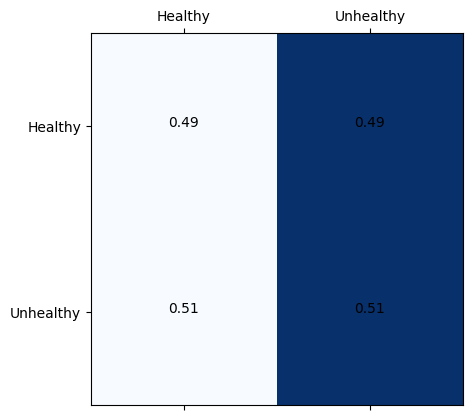

In [ ]:
# Accuracy for class 'Healthy'
Ah_rf = np.mean(y_pred_rf_test[Y_test.astype(int)==0]==0)

# Accuracy for class 'Unhealthy'
Au_rf = np.mean(y_pred_rf_test[Y_test.astype(int)==1]==1)

# Misclassification for class 'Healthy'
Mh_rf = np.mean(y_pred_rf_test[Y_test.astype(int)==0]==1)

# Misclassification for class 'unhealthy'
Mu_rf = np.mean(y_pred_rf_test[Y_test.astype(int)==1]==0)

CM_rf = np.array([[Ah_rf, Mh_rf],[Mu_rf, Au_rf]])

showConfMat(CM_rf)

**Summary:**

- The confusion matrix suggests an equal probability of predicting both positive and negative values, each accounting for 50% of the predictions.

- The RandomForestClassifier showed excellent performance on the training
dataset, indicating effective learning from the provided data.

- However, on the test dataset, the accuracy dropped to 50%, suggesting potential overfitting on the training data and limited generalization to new, unseen data.


**Recommendations:**
- Adjusting hyperparameters or model complexity to improve generalization.

- Evaluate other machine learning models or perform further tuning to enhance overall model performance.

**XGBClassifierr model evaluation**

In [ ]:
# Evaluate the XGBClassifier
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb_test)
print(f"XGBClassifier Test Accuracy: {accuracy_xgb}")

train_accuracy_xgb = accuracy_score(Y_train, y_pred_xgb_train)
print(f"XGBClassifier Train Accuracy: {train_accuracy_xgb}")

# Display classification report for XGBClassifier
print("XGBClassifier Test Classification Report:")
print(classification_report(Y_test, y_pred_xgb_test))

# Display classification report for XGBClassifier
print("XGBClassifier Train Classification Report:")
print(classification_report(Y_train, y_pred_xgb_train))

XGBClassifier Test Accuracy: 0.5066666666666667
XGBClassifier Train Accuracy: 0.7971428571428572
XGBClassifier Test Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50        75
           1       0.51      0.52      0.51        75

    accuracy                           0.51       150
   macro avg       0.51      0.51      0.51       150
weighted avg       0.51      0.51      0.51       150

XGBClassifier Train Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       175
           1       0.81      0.77      0.79       175

    accuracy                           0.80       350
   macro avg       0.80      0.80      0.80       350
weighted avg       0.80      0.80      0.80       350



**Interpretation:**

 - The model has lower accuracy on the test dataset compared to the training dataset, suggesting potential overfitting.
Precision, recall, and F1-score are provided for both positive and negative classes.

**Confusion Matrix**

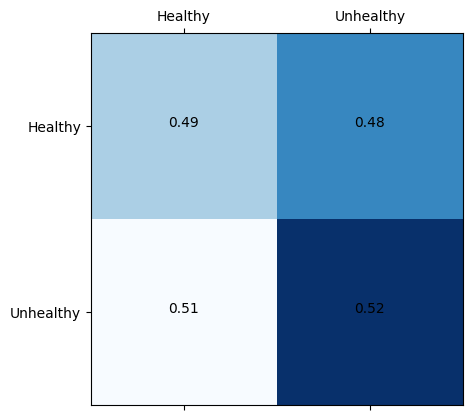

In [ ]:
# Accuracy for class 'Healthy'
Ah_xgb = np.mean(y_pred_xgb_test[Y_test.astype(int)==0]==0)

# Accuracy for class 'Unhealthy'
Au_xgb = np.mean(y_pred_xgb_test[Y_test.astype(int)==1]==1)

# Misclassification for class 'Healthy'
Mh_xgb = np.mean(y_pred_xgb_test[Y_test.astype(int)==0]==1)

# Misclassification for class 'unhealthy'
Mu_xgb = np.mean(y_pred_xgb_test[Y_test.astype(int)==1]==0)

CM_xgb = np.array([[Ah_xgb, Mh_xgb],[Mu_xgb, Au_xgb]])

showConfMat(CM_xgb)

**KNN Classifier model evaluation**

In [ ]:
# Evaluating the KNN Classifier
accuracy_knn = accuracy_score(Y_test, y_pred_knn_test)
print(f"KNN Test Accuracy: {accuracy_knn}")

train_accuracy_knn = accuracy_score(Y_train, y_pred_knn_train)
print(f"KNN Train Accuracy: {train_accuracy_knn}")

# Displaying classification report for KNN Classifier
print("KNN Test Classification Report:")
print(classification_report(Y_test, y_pred_knn_test))

print("KNN Train Classification Report:")
print(classification_report(Y_train, y_pred_knn_train))

KNN Test Accuracy: 0.6066666666666667
KNN Train Accuracy: 0.6714285714285714
KNN Test Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.61        75
           1       0.61      0.59      0.60        75

    accuracy                           0.61       150
   macro avg       0.61      0.61      0.61       150
weighted avg       0.61      0.61      0.61       150

KNN Train Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       175
           1       0.67      0.66      0.67       175

    accuracy                           0.67       350
   macro avg       0.67      0.67      0.67       350
weighted avg       0.67      0.67      0.67       350



**Confusion Matrix**

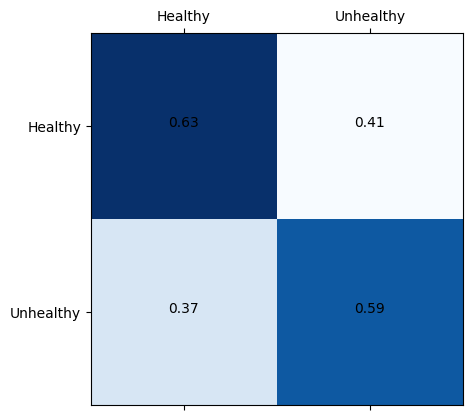

In [ ]:
# Accuracy for class 'Healthy'
Ah_knn = np.mean(y_pred_knn_test[Y_test.astype(int)==0]==0)

# Accuracy for class 'Unhealthy'
Au_knn = np.mean(y_pred_knn_test[Y_test.astype(int)==1]==1)

# Misclassification for class 'Healthy'
Mh_knn = np.mean(y_pred_knn_test[Y_test.astype(int)==0]==1)

# Misclassification for class 'unhealthy'
Mu_knn = np.mean(y_pred_knn_test[Y_test.astype(int)==1]==0)

CM_knn = np.array([[Ah_knn, Mh_knn],[Mu_knn, Au_knn]])

showConfMat(CM_knn)

Comparing all the algorithm results:

**RandomForestClassifier:**

- Train Accuracy: 0.91
- Test Accuracy: 0.50

**XGBClassifier**:
- Train Accuracy: 0.73
- Test Accuracy: 0.47

**KNeighborsClassifier:**

- Train Accuracy: 0.67
- Test Accuracy: 0.61

**Linear SVCClassifier:**

- Train Accuracy: 0.56
- Test Accuracy:  0.51

**Recommendation:**

RandomForestClassifier has the highest train accuracy (0.91) but significantly lower test accuracy (0.50), indicating potential overfitting.

XGBClassifier and Linear SVCClassifier have similar performance with a test accuracy of 0.51 and train accuracy of 0.56.

KNeighborsClassifier has a relatively better test accuracy of 0.61.

**Suggested Model:**

XGBoost is chosen for its powerful gradient boosting framework, enabling it to handle both linear and non-linear relationships in the data. It sequentially builds trees, with each tree correcting errors from previous ones. XGBoost also provides valuable insights into feature importance, aiding in feature selection and interpretability.

While the KNeighborsClassifier demonstrated a relatively better test accuracy, XGBoost is selected for its robust performance and feature interpretability. Further optimization of hyperparameters could enhance its effectiveness on unseen data, ensuring a balanced and generalized model. XGBoost's versatility and success in handling diverse scenarios make it a compelling choice for the final predictions on test images.

**TEST IMAGES PREDICTION**

We are using XGBoost to predict and test the images

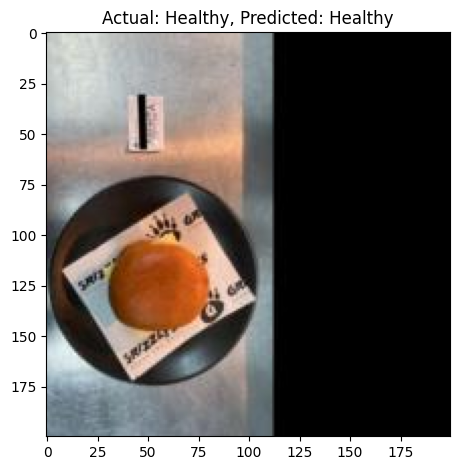

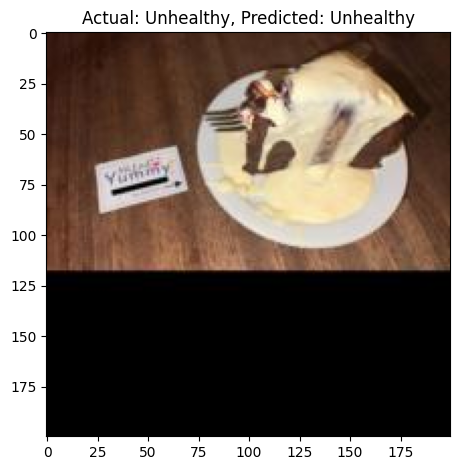

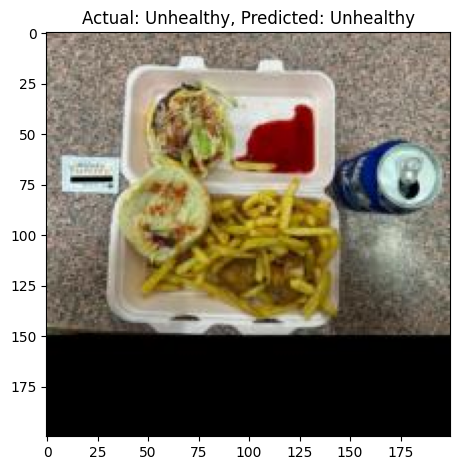

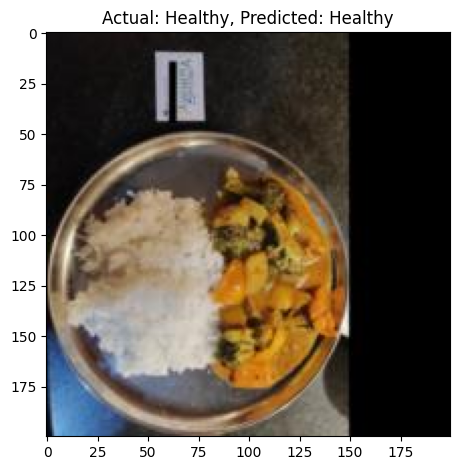

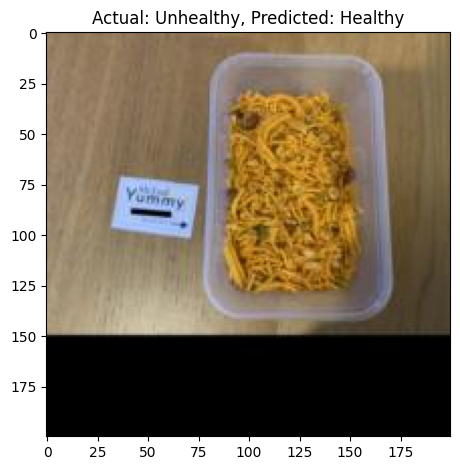

In [ ]:
#  DataFrame to store the results
test_results_df = pd.DataFrame({
    'Actual_Labels': Y_test,
    'Predicted_Labels': y_pred_xgb_test #XGB predicted test values
})

# Mapping numerical labels to categories
label_mapping = {0: 'Healthy', 1: 'Unhealthy'}
test_results_df['Actual_Labels'] = test_results_df['Actual_Labels'].map(label_mapping)
test_results_df['Predicted_Labels'] = test_results_df['Predicted_Labels'].map(label_mapping)

# visualize a few predictions along with images
num_samples_to_visualize = 5
for i in range(num_samples_to_visualize):
    # Get the i-th test image
    test_image = X_test[i]

    # Get the actual and predicted labels
    actual_label = test_results_df['Actual_Labels'].iloc[i]
    predicted_label = test_results_df['Predicted_Labels'].iloc[i]

    # Display the image with actual and predicted labels
    plt.imshow(test_image)
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.tight_layout()
    plt.show()




In [ ]:
# Calculate error rate
error_rate = (test_results_df['Actual_Labels'] != test_results_df['Predicted_Labels']).mean()

# Display the error rate
print(f'Error Rate: {error_rate:.2%}')

Error Rate: 49.33%


# **9.Conclusion:**

- The objective of the project was to build a machine learning pipeline to predict whether a dish in a image is healthy or unhealthy. The analysis focused on utilizing image data and various machine learning models for classification, including k-Nearest Neighbors (KNN), RandomForest, XGBoost, and Linear Support Vector Classifier (Linear SVC).


- Despite achieving moderate accuracy, the models demonstrated limitations in generalizing to unseen data.

- Further steps include hyperparameter tuning, cross-validation, and exploring additional features to improve model performance.

- Investigate and address potential overfitting issues observed in the RandomForest model.

- The complexity of dish classification based on images requires a  balance of model complexity and generalization.

- Continuous refinement and experimentation with different models and features are essential for achieving better predictive performance.

- The project provides a foundation for further exploration and refinement, emphasizing the iterative nature of model development in machine learning.


  *Predicting if a dish is healthy is a journey, not a destination. We're in the kitchen, experimenting and refining for tastier, more accurate results!🌟🍲*